# [goulib](../notebook.ipynb).image
image processing made easy

Combines flexibility of [PIL Python Imaging Library (Pillow)](https://pypi.python.org/pypi/Pillow/) with the power of [scikit-image](http://scikit-image.org/) embedded in an easy to use Image class

In [3]:
from goulib.notebook import *
from goulib.image import *

import PIL.Image as PILImage

In [4]:
lena_original=Image('../../tests/data/lena.png') #Image can be init'ed from a path

In [5]:
from skimage import data
camera_original=Image(data.camera()) #or from an array

In [6]:
# Image has many "PIL compatible" methods, but they always return a result Image
# instead of working in-place :
size=(128,128)
lena=lena_original.resize(size)
lena_gray=lena.grayscale()
camera=camera_original.resize(size,PILImage.LANCZOS)

## Rendering

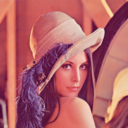

In [7]:
lena #images have a default HTML representation

,,
lena,lena gray,camera

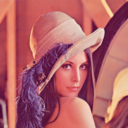
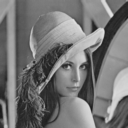
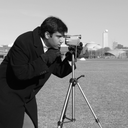

In [8]:
from goulib.table import Table # images can also be put in tables ! and they're responsive !
Table([[lena,lena_gray,camera],['lena','lena gray','camera']])

## Image modes and Conversions

In [9]:
#Images have an attached immutable "mode" string:
h(str(lena)) #usually RGB(A) (float) for color images
h(str(lena_gray)) #gray images can be either F (float) or L (int)

In [10]:
h(modes) #supported modes are those from scipy + those from PIL (but in float instead of uint)

In [11]:
converters.edges() #a graph between modes

OutMultiEdgeDataView([('bool', 'gray'), ('bool', 'rgb'), ('gray', 'bool'), ('gray', 'rgb'), ('gray', 'rgba'), ('rgb', 'gray'), ('rgb', 'rgba'), ('rgb', 'cmyk'), ('rgb', 'lab'), ('rgb', 'xyz'), ('rgb', 'hsv'), ('rgba', 'rgb'), ('ind', 'rgb'), ('cmyk', 'rgb'), ('lab', 'ind'), ('lab', 'rgb'), ('lab', 'xyz'), ('xyz', 'rgb'), ('xyz', 'lab'), ('hsv', 'rgb')])

c:\Users\Philippe\anaconda3\Lib\site-packages\skimage\util\dtype.py:576: UserWarning: Downcasting int32 to uint8 without scaling because max value 1 fits in uint8
  return _convert(image, np.uint8, force_copy)
c:\Users\Philippe\anaconda3\Lib\site-packages\skimage\util\dtype.py:527: UserWarning: Downcasting int64 to uint16 without scaling because max value 255 fits in uint16
  return _convert(image, np.uint16, force_copy)
c:\Users\Philippe\anaconda3\Lib\site-packages\skimage\util\dtype.py:576: UserWarning: Downcasting uint16 to uint8 without scaling because max value 255 fits in uint8
  return _convert(image, np.uint8, force_copy)


"ERROR : Image(mode=F shape=(128, 128, 1) type=float64) _repr_html_ failed : Images of type float must be between -1 and 1.",,,,,,,,,,,
1,CMYK,F,HSV,I,L,LAB,P,RGB,RGBA,U,XYZ

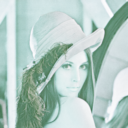
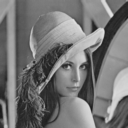
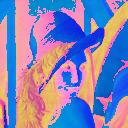
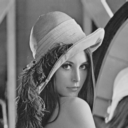
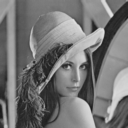
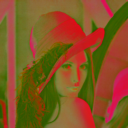
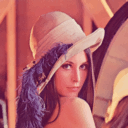
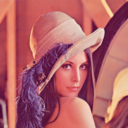
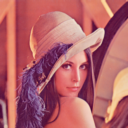
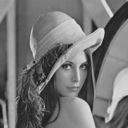
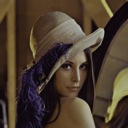

In [12]:
#conversions from/to any mode are implemented by traversing the graph automagically
lena_conv=dict((mode, lena.convert(mode)) for mode in modes)
lena_conv['1']*=255 # multiply 0/1 image so we can see it
Table([[lena_conv[m],m] for m in sorted(lena_conv)]).transpose()

note that displaying multi channel images assumes RGB(A) images, so for the above images we have:
- LAB : L=Red, A=Green, B=Blue (low)
- HSV : H=Red, S=Green, V=Blue
- CMYK: C=RED (almost zero), M=Green, Y=Blue, K=Alpha transparency (hence the image is low contrast)

## Color / Planes separation and reconstruction

Lena,Gray,R,G,B
,,,,

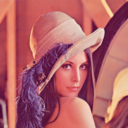
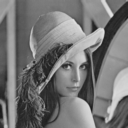
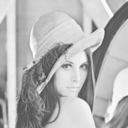
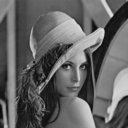
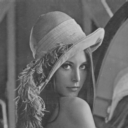

In [13]:
lena_rgb=lena.split() #extract gray level images from each channel
images=[lena,lena_gray]+lena_rgb
Table([images],titles=['Lena','Gray']+[c for c in lena.mode]) 

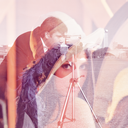

In [14]:
camera=camera.convert('F') #not all conversions are automatic yet ...
Image(lena_rgb+[-camera]) # merges color planes and use camera as alpha channel

Lena,L,A,B
,,,

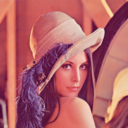
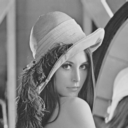
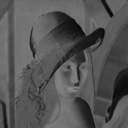
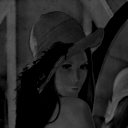

In [15]:
lena_lab=lena_conv['LAB'].split() #extract gray level images from each channel
images=[lena]+lena_lab
Table([images],titles=['Lena']+[c for c in lena_conv['LAB'].mode]) 

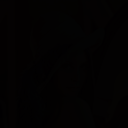

In [16]:
Image(lena_lab,'LAB').convert('RGB')
lena_conv['LAB'].convert('RGB')

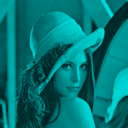

In [17]:
lena_gray*'cyan' #gray colors can be multiplied by a color to make a colorized image

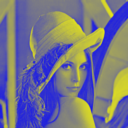

In [18]:
lena_gray.colorize('blue','yellow') #colorize between specified black and white colors

Cyan,Magenta,Yellow,blacK
,,,
,,,

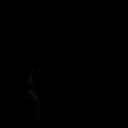
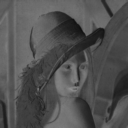
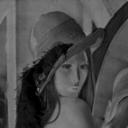
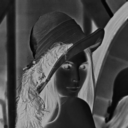
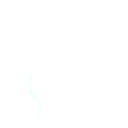
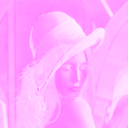
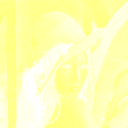
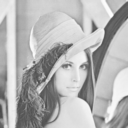

In [19]:
colors=['Cyan','Magenta','Yellow','blacK']
cmyk=lena.split('CMYK') # converts from RGB to CMYK under the hood
cmyk2=[im.colorize(col) for im,col in zip(cmyk,colors)] 
Table([cmyk,cmyk2],titles=colors)

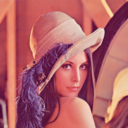

In [20]:
#rebuild color image from colorized CMYK planes
cmyk2[0]-(-cmyk2[1])-(-cmyk2[2])-(-cmyk2[3]) #what a strange syntax ...

## Palette and colors reduction

optimal palette is computed automatically in Lab space from a k-means segmentation of a radom subset of pixels (see http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html )

c:\Users\Philippe\anaconda3\Lib\site-packages\skimage\util\dtype.py:527: UserWarning: Downcasting int64 to uint16 without scaling because max value 4 fits in uint16
  return _convert(image, np.uint16, force_copy)
c:\Users\Philippe\anaconda3\Lib\site-packages\skimage\util\dtype.py:576: UserWarning: Downcasting uint16 to uint8 without scaling because max value 4 fits in uint8
  return _convert(image, np.uint8, force_copy)



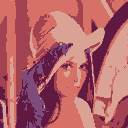

In [21]:
lenaP=lena.convert('P',colors=5) #image can be reduced to any number of colors
h(lenaP,lenaP.palette) # the optimal palette is computed automatically


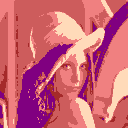

In [22]:
#palette can also be explicitely specified
from goulib.colors import Palette
palette=Palette(['purple','peachpuff','indianred','brown','lightcoral'])
lenaP=lena.convert('P',colors=palette)
h(lenaP,lenaP.palette)

## Dithering

c:\Users\Philippe\anaconda3\Lib\site-packages\skimage\util\dtype.py:576: UserWarning: Downcasting int64 to uint8 without scaling because max value 1 fits in uint8
  return _convert(image, np.uint8, force_copy)
c:\Users\Philippe\anaconda3\Lib\site-packages\skimage\util\dtype.py:576: UserWarning: Downcasting int32 to uint8 without scaling because max value 1 fits in uint8
  return _convert(image, np.uint8, force_copy)


nearest,random,floyd-steinberg,philips,sierra lite,stucki,"Jarvis, Judice, and Ninke",Atkinson,Burkes
,,,,,,,,
,,,,,,,,
,,,,,,,,

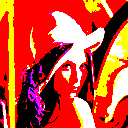
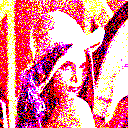
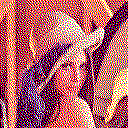
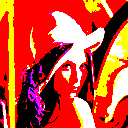
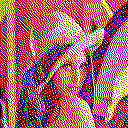
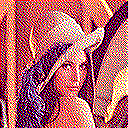
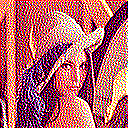
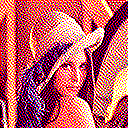
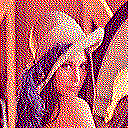
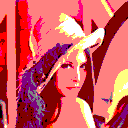
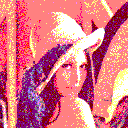
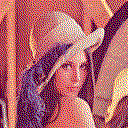
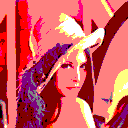
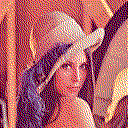
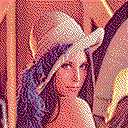
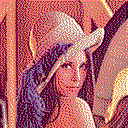
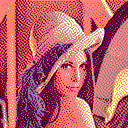
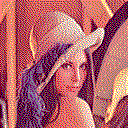
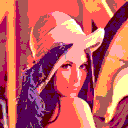
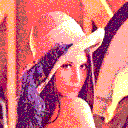
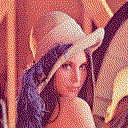
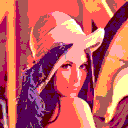
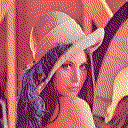
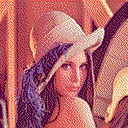
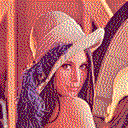
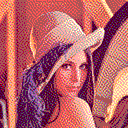
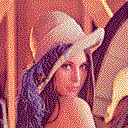

In [23]:
Table([[lena.dither(method,n) for method in dithering] for n in (2,3,4)], titles=dithering.values())


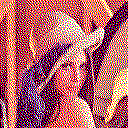

In [24]:
lena_dither=lena.dither() # applies automatically to RGB planes
h(lena_dither,'1 bit dithering')


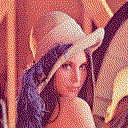

In [25]:
h(lena.dither(n=4),'2 bit dithering')

## Geometric Transforms


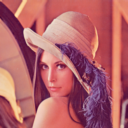
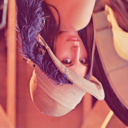

In [26]:
lena_fx=lena.flip()
lena_fy=lena.flip(False,True)
h(lena_fx,lena_fy)

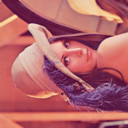

In [27]:
lena_180=lena.rotate(180)
lena_90=lena.rotate(90)
lena_90

Rotated image is perfect for multiples of 90 degrees, but for other values we must care of the missing pixels somehow

,,,,

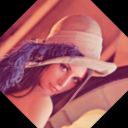
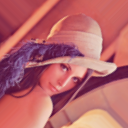
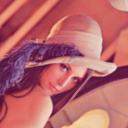
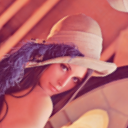
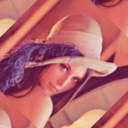

In [28]:
Table([[lena.rotate(-45,mode=m) for m in ['constant', 'edge', 'symmetric', 'reflect', 'wrap']]])

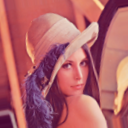

In [29]:
lena_10=lena.rotate(10) # mode ='edge' by default
lena_10

## Hash and Distances

Two methods to hash images ( Average_hash and Perceptual_hash [described here](http://www.hackerfactor.com/blog/index.php?/archives/432-Looks-Like-It.html) are implemented)

In [30]:
h(hex(hash(lena))) # uses average_hash by default
h(hex(lena.perceptual_hash())) # both hash methods return 64 bits integer by default
h(hex(lena.perceptual_hash(4)), hex(lena.perceptual_hash(12))) # but shorter or larger hashes can be obtained

"distances" between images can be easily calculated from the proportion of different bits in both hashes

note that a distance of 1 means "totally different" while a distance of 2 means "inverted"

In [31]:
images=[lena,lena_dither,lena_gray,-lena,lena_10, camera]
adist=["average dist"]+[im.dist(lena,Image.average_hash) for im in images[1:]]
pdist=["perceptual dist"]+[im.dist(lena,Image.perceptual_hash) for im in images[1:]]
Table([images,adist,pdist],titles=['Lena','Dither','Gray','Negative','Rotate','Camera',])

TypeError: list indices must be integers or slices, not function

Lena,Flip X,Flip Y,Rot 180°,Rot 90°,Rot 10°
,,,,,
dist,1.25,0.75,1.25,1.19,0.34

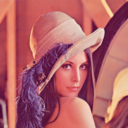
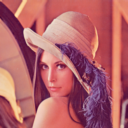
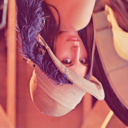
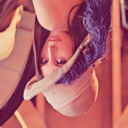
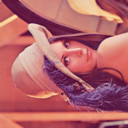
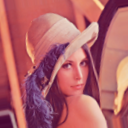

In [32]:
#Image.dist is independent of the image size or mode, but does not handle symmetries and rotations by default

images=[lena,lena_fx,lena_fy,lena_180,lena_90,lena_10]
dist=["dist"]+[im.dist(lena) for im in images[1:]]
Table([images,dist],titles=['Lena','Flip X','Flip Y','Rot 180°','Rot 90°','Rot 10°'])

Lena,Flip X,Flip Y,Rot 180°,Rot 90°,Rot 10°
,,,,,
dist,0,0,0,0,0.34

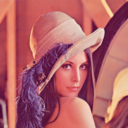
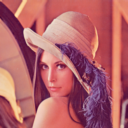
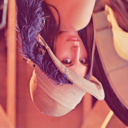
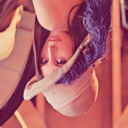
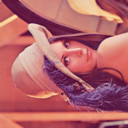
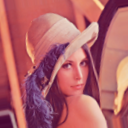

In [33]:
#However, Image.dist has an option to handle symmetries and rotations by 90°

images=[lena,lena_fx,lena_fy,lena_180,lena_90,lena_10]
dist=["dist"]+[im.dist(lena,symmetries=True) for im in images[1:]]
Table([images,dist],titles=['Lena','Flip X','Flip Y','Rot 180°','Rot 90°','Rot 10°'])

## Canvas and geometric transformations

,,,,,"ERROR : Image(mode=RGB shape=(150, 150, 3) type=float64) _repr_html_ failed : Images of type float must be between -1 and 1."

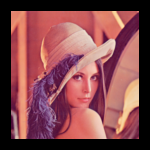
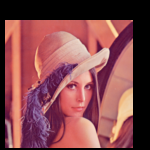
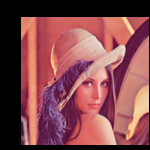
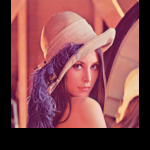
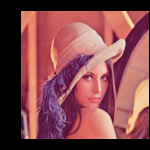

In [34]:
images=[
    lena.expand((150,150)),       # centered by default
    lena.expand((150,150),5,20),  # dx,dy offset
    lena.expand((150,150),-1,-5), # negative offsets wr to lower right
    lena.expand((150,150),None,0),#centered in X, offset in Y
    lena.expand((150,150),-1,None),#centered in Y, offset in X
    lena.expand((150,150),0,0).shift(3.25,2.5) #and we can do SUBPIXEL shifts !!!
]
Table([images])
    

,"ERROR : Image(mode=RGB shape=(129, 129, 3) type=float64) _repr_html_ failed : Images of type float must be between -1 and 1."

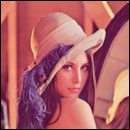

In [35]:
images=[
    lena.expand((130,130),1,1), # 1 pixel border
    lena.expand((129,129),0.5,0.5) #  half pixel border ... can you see the difference?
    ]
Table([images])

## Slices, composition

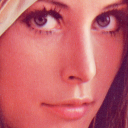

In [36]:
face=lena_original[246:374,225:353] # images can be sliced . Note the first coordinate is Y, then X
face

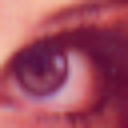

In [37]:
eye=face[3:35,-35:-3] # negative indexes are handy in some cases
eye.scale(4)

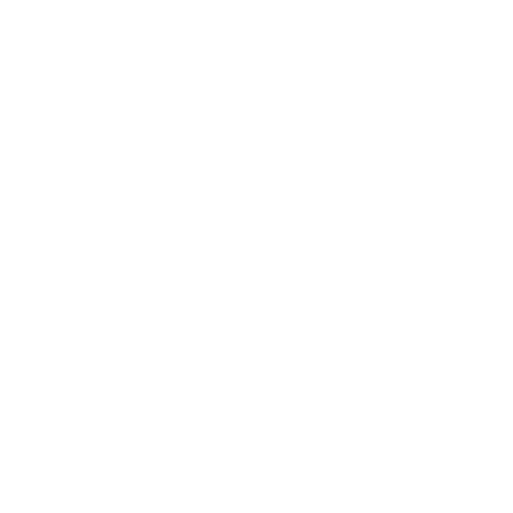

In [38]:
left=lena_original[:,0:256]
right=lena_original[:,256:]
stitched=Image(size=(513,513),mode='RGB',color='white')
stitched.add(left,(0,0))
stitched.add(right.shift(1,0),(256,0))
stitched

## Image Creation

254


c:\Users\Philippe\anaconda3\Lib\site-packages\skimage\util\dtype.py:552: UserWarning: Downcasting int32 to int16 without scaling because max value 254 fits in int16
  return _convert(image, np.int16, force_copy)
c:\Users\Philippe\anaconda3\Lib\site-packages\skimage\util\dtype.py:576: UserWarning: Downcasting int16 to uint8 without scaling because max value 254 fits in uint8
  return _convert(image, np.uint8, force_copy)


,

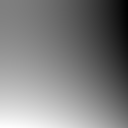
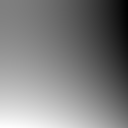

In [39]:
# Image can be created from standard Python lists and iterators
# colormaps can be used to generate color images
from matplotlib import cm
a=[[-x*x+y*y for x in range(128)] for y in range(128)]
a=normalize(a)
print(a.max())
im=Image(a)
Table([[im,Image(a,colormap=cm.nipy_spectral)]])

"ERROR : Image(mode=RGB shape=(128, 128, 3) type=float64) _repr_html_ failed : Images of type float must be between -1 and 1.",,

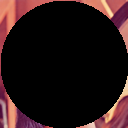
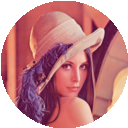

In [40]:
mask=disk(64)
Table([[lena+mask,lena-mask,lena*mask]])

## Filtering
gray level filters are automatically applied to RGB color planes and results re-merged in a color image

Filters can be:
* those available in PIL
* those in skimage
* custom functions

,,,,
,,,,

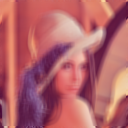
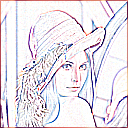
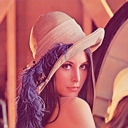
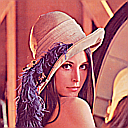
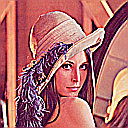
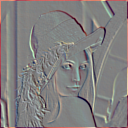
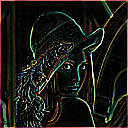
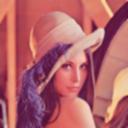
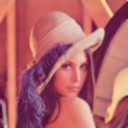
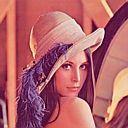

In [41]:
from PIL.ImageFilter import *
pilfilters=[BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE, EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN]
lena_filtered=[lena.filter(f) for f in pilfilters]
from goulib.itertools2 import reshape
Table(reshape(lena_filtered,(0,5))) # nice way to limit table width, isn't it ?

,,,

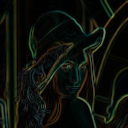
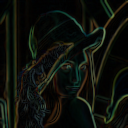
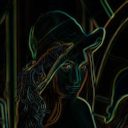
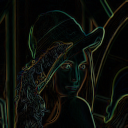

In [42]:
from skimage.filters import sobel, prewitt, scharr, roberts
#demo with all filters that need no extra parameter
skifilters=[ sobel, prewitt, scharr, roberts]
lena_filtered=[lena.filter(f) for f in skifilters]
Table(reshape(lena_filtered,(0,5)))

In [43]:
R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = lena_rgb[R].filter(lambda i: 0 if i < 100 else 255)

# process the green band
out = lena_rgb[G].filter(lambda i: i * 0.1)

# paste the processed band back, but only where red was < 100
lena_rgb[R].paste(out, None, mask)

# build a new multiband image
Image(lena_rgb)

TypeError: <lambda>() missing 1 required positional argument: 'i'

## Correlation

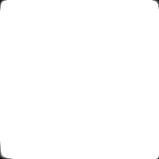

In [ ]:
face.grayscale().correlation(eye.grayscale())